In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("Dataset shape:", X.shape)
print("Target stats:\n", y.describe())

Dataset shape: (442, 10)
Target stats:
 count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


In [3]:
pd.concat([X, y], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


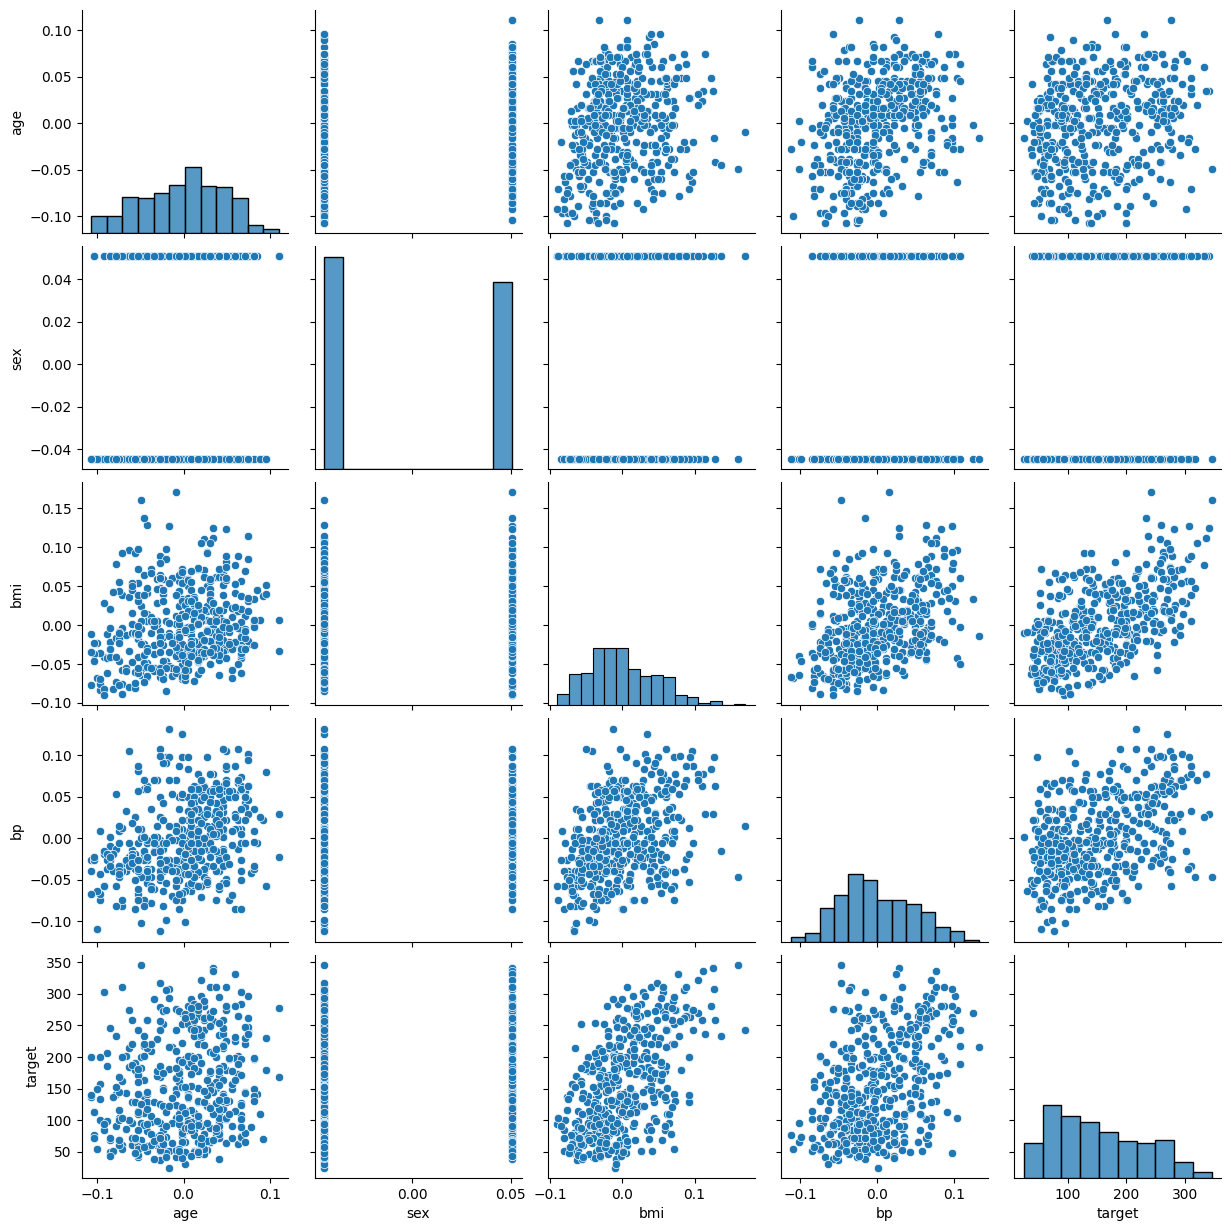

In [4]:
# Pairplot for first few features
sns.pairplot(pd.concat([X.iloc[:, :4], y], axis=1))
# plt.savefig("pairplot.png")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
pd.concat([X_train, y_train], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0


In [7]:
pd.concat([X_test, y_test], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,219.0
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,202.0
321,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,111.0


In [8]:
# X_train.to_csv("X_train_reg.csv", index=False)
# X_test.to_csv("X_test_reg.csv", index=False)
# y_train.to_csv("y_train_reg.csv", index=False)
# y_test.to_csv("y_test_reg.csv", index=False)

Let's use ML now

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_train = pd.read_csv("X_train_reg.csv")
# X_test = pd.read_csv("X_test_reg.csv")
# y_train = pd.read_csv("y_train_reg.csv").values.ravel()
# y_test = pd.read_csv("y_test_reg.csv").values.ravel()

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
for name, model in models.items():
    print(f"\n🔹 Training {name}")
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")
    print("Mean CV R²:", scores.mean())

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Test R²:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


🔹 Training Linear Regression
Mean CV R²: 0.4803645434411372
Test R²: 0.4526027629719197
RMSE: 53.853445836765914

🔹 Training Ridge Regression
Mean CV R²: 0.39371511187846686
Test R²: 0.41915292635986545
RMSE: 55.47446204180109


In [31]:
pd.DataFrame(X_test.iloc[0,:]).T

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.00522


In [40]:
print(round(model.predict(pd.DataFrame(X_test.iloc[2]).T)[0], 0))

155.0
